<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *6*: *SVM***

###**Tenggat Waktu: 20 November 2021, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: F_Lab1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **20 November 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pertanyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Muhammad Ichsanul Amal"
KELAS = "C"
NPM = "1906353454"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    """
    https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
    https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
    https://www.quora.com/Support-Vector-Machines-When-should-I-use-a-polynomial-basis-over-a-radial-basis
    https://www.researchgate.net/post/Diffference_between_SVM_Linear_polynmial_and_RBF_kernel
    
    """
]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Ichsanul Amal dari kelas C dengan NPM 1906353454, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Ichsanul Amal)


#SVM

Support Vector Machine (SVM) adalah salah satu metode supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification) dan regresi (Support Vector Regression). Dalam pemodelan klasifikasi, SVM memiliki konsep yang lebih matang dan lebih jelas secara matematis dibandingkan dengan teknik-teknik klasifikasi lainnya. SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.

SVM digunakan untuk mencari hyperplane terbaik dengan memaksimalkan jarak antar kelas. Hyperplane adalah sebuah fungsi yang dapat digunakan untuk pemisah antar kelas. 

Dalam tutorial kali ini, kita menggunakan SVC, yaitu model klasifikasi yang menggunakan SVM



## Contoh penggunaan SVM

**Perlu diperhatikan kalau Library SVM hanya menerima dataset yang telah diubah ke numpy.ndarray, sehingga jika datasetnya masih dalam bentuk pandas, maka ubah ke numpy.ndarray**

Diambil dari : https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [3]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [4]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [5]:
# print data(feature)shape
cancer.data.shape

(569, 30)

In [6]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [7]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [9]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics




In [11]:

print("Precision:",metrics.precision_score(y_test, y_pred))


print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


## Perbedaan tiap kernel SVC

Dalam library SVC, terdapat parameter `kernel` dimana menentukan rumus yang digunakan oleh library SVC 

Lebih lanjut tentang SVC dapat dilihat di docs sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

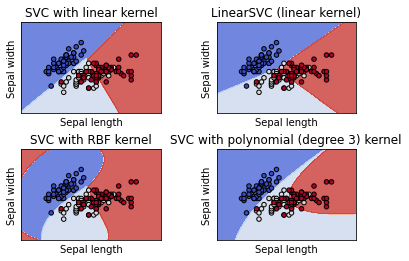

In [12]:
#source : https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Perbedaan tiap kernel SVR

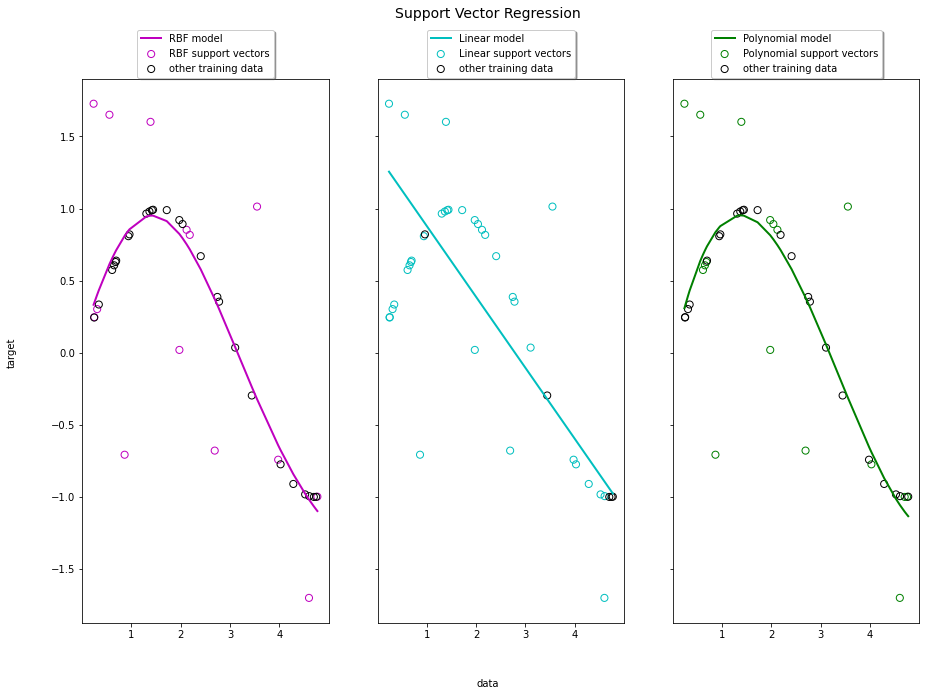

In [13]:
#source https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## Import Libraries and Data

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
mobile_prices = pd.read_csv('mobile_prices.csv')

In [16]:
# Mencetak dimensi data
print("data: ", mobile_prices.shape)

data:  (2000, 21)


In [17]:
mobile_prices.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'fc'}>],
       [<AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>,
        <AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>],
       [<AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>,
        <AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>],
       [<AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}>],

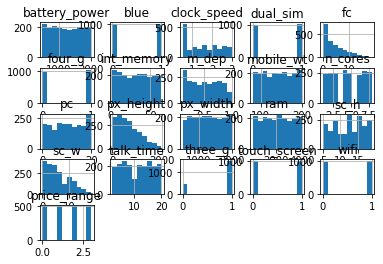

In [18]:
mobile_prices.hist()

### Penjelasan Dataset

Dataset yang digunakan adalah dataset Mobile Prices dimana kita memklasifikasi handphone lewat harganya, terdapat 21 atribut dan target atributnya adalah price_range

Penjelesan atribut:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## SOAL 1

Lakukanlah preprocessing terhadap data terlebih dahulu. Untuk memudahkan, silakan ikut langkah-langkah di bawah ini:

### SOAL 1a

Lakukan penanganan terhadap missing value pada data (Jika ada). Sertakan juga alasan dalam pemilihan penanganan missing value tersebut.

In [19]:
# Cek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(mobile_prices)


Empty DataFrame
Columns: [Total, Percent]
Index: []


Tidak ada missing value

### SOAL 1b

Lakukan penanganan terhadap duplikasi pada data (Jika ada). Sertakan juga alasan dalam pemilihan penanganan duplikasi data tersebut.

In [20]:
# Implementasi code di sini
mobile_prices.duplicated().sum()

0

Tidak ada data duplicate

### SOAL 1c

Lakukan penanganan terhadap outlier pada data (Jika ada). Sertakan juga alasan dalam pemilihan penanganan outlier tersebut.

In [21]:
# Implementasi code di sini
data = mobile_prices.select_dtypes(exclude="object")

# Cek outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                18
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g          477
touch_screen       0
wifi               0
price_range        0
dtype: int64

`three_g` akan didiamkan karena merupakan data nominal. Selanjutnya akan dilihat outlier `fc` dan `px_height`

In [22]:
(mobile_prices.fc >  (Q3.fc + 1.5 * IQR.fc)).sum()

18

Outlier dari `fc` dan `px_height` akan didrop karena hanya sedikit atau tidak terlalu berpengaruh signifikan apabila didrop.

In [23]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [24]:
for col in ("px_height", "fc"):
    lowerbound,upperbound = outlier_treatment(mobile_prices[col])
    mobile_prices.drop(mobile_prices[ (mobile_prices[col] > upperbound) | (mobile_prices[col] < lowerbound) ].index , inplace=True)


### SOAL 1d (Optional)

Silakan lakukan preprocessing data lainnya yang dibutuhkan

In [25]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = mobile_prices.drop(["price_range"], axis=1)
y = mobile_prices["price_range"].ravel()

In [26]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=82) # 70% training and 30% test

In [27]:
# Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## SOAL 2 (Linear SVC)

Implementasikan Linear SVC. Untuk soal ini gunakan library SVC dengan kernel linear dan LinearSVC kemudian bandingkan kedua library tersebut, sekalian lakukan hyperparameter tuning C untuk meningkatan akurasi model (Coba gunakan GridSearchCV).
* C merupakan parameter penalty, yang merepresentasikan
misklasifikasi atau error term. Misklasifikasi menjelaskan seberapa
besar error yang dapat ditoleransi untuk optimisasi SVM. Parameter ini
berkaitan dengan bagaimana kita mengontrol tradeoff antara
penetapan decision boundary (hyperplane) dengan error term. 

Tampilkan nilai akurasi, presisi, recall, dan F1-Score dari hasil prediksi yang didapat.

### SOAL 2a (SVC dengan kernel linear)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
                'kernel': ['linear']}
 
grid = GridSearchCV(SVC(), param_grid,)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']})

In [29]:
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'kernel': 'linear'}
SVC(C=100, kernel='linear')


In [30]:
y_pred = grid.predict(X_test)

In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# print classification report
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))



[[138   1   0   0]
 [  4 147   0   0]
 [  0  10 143   3]
 [  0   0   5 143]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       139
           1       0.93      0.97      0.95       151
           2       0.97      0.92      0.94       156
           3       0.98      0.97      0.97       148

    accuracy                           0.96       594
   macro avg       0.96      0.96      0.96       594
weighted avg       0.96      0.96      0.96       594



### SOAL 2b (LinearSVC)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
 
grid = GridSearchCV(LinearSVC(dual=False), param_grid,)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=LinearSVC(dual=False),
             param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [33]:
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10}
LinearSVC(C=10, dual=False)


In [34]:
y_pred = grid.predict(X_test)

In [35]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# print classification report
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))



[[139   0   0   0]
 [  9 102  40   0]
 [  0  43 109   4]
 [  0   0   2 146]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       139
           1       0.70      0.68      0.69       151
           2       0.72      0.70      0.71       156
           3       0.97      0.99      0.98       148

    accuracy                           0.84       594
   macro avg       0.83      0.84      0.84       594
weighted avg       0.83      0.84      0.83       594



### SOAL 2c

Lakukan perbandingan terhadap hasil yang didapat pada soal nomor 2a dan 2b. Lakukan analisis terhadap kedua hasil tersebut dan tuliskan hasil analisis yang didapat.

Berdasarkan nilai akurasi dan f1-score dari beberapa kelas didapatkan bahwa SVC memberikan skor yang lebih tinggi. Walaupun pada proses fitting model lebih lama daripada LinearSVC, SVC memberikan skor yang lebih tinggi. Salah satu alasan yang mungkin adalah karena pendekatan one-against-one merupakan pendekatan yang standar pada modul scikit-learn SVC sedangkan pendekatan one-against-all merupakan pendekatan yang standar pada modul scikit-learn LinearSVC dari Python sehingga one-against-one lebih baik pada kasus ini dimana SVC menerapkannya.

## SOAL 3 (Non-Linear SVC)

Implementasikan Non-Linear SVC. Untuk soal ini gunakan library SVC dengan kernel poly, rbf, dan sigmoid kemudian bandingkan ketiga library tersebut, sekalian lakukan hyperparameter tuning C untuk meningkatan akurasi model (Coba gunakan GridSearchCV). 

Tampilkan nilai akurasi, presisi, recall, dan F1-Score dari hasil prediksi yang didapat.

### SOAL 3a (Poly)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly']}
 
grid = GridSearchCV(SVC(degree=3) , param_grid,)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly']})

In [37]:
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=0.1, gamma=0.1, kernel='poly')


In [38]:
y_pred = grid.predict(X_test)

In [39]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# print classification report
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[120  19   0   0]
 [ 13 112  26   0]
 [  0  36 108  12]
 [  0   1  45 102]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       139
           1       0.67      0.74      0.70       151
           2       0.60      0.69      0.64       156
           3       0.89      0.69      0.78       148

    accuracy                           0.74       594
   macro avg       0.77      0.75      0.75       594
weighted avg       0.76      0.74      0.75       594



### SOAL 3b (RBF)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid,)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [41]:
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [42]:
y_pred = grid.predict(X_test)

In [43]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# print classification report
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))



[[138   1   0   0]
 [  9 142   0   0]
 [  0  12 142   2]
 [  0   0   9 139]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       139
           1       0.92      0.94      0.93       151
           2       0.94      0.91      0.93       156
           3       0.99      0.94      0.96       148

    accuracy                           0.94       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.94      0.94       594



### SOAL 3c (Sigmoid)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid,)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid']})

In [45]:
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}
SVC(C=1000, gamma=0.001, kernel='sigmoid')


In [46]:
y_pred = grid.predict(X_test)

In [47]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# print classification report
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))



[[139   0   0   0]
 [  7 141   3   0]
 [  0  10 144   2]
 [  0   0  11 137]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       139
           1       0.93      0.93      0.93       151
           2       0.91      0.92      0.92       156
           3       0.99      0.93      0.95       148

    accuracy                           0.94       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.94      0.94       594



### SOAL 3d

Lakukan perbandingan terhadap hasil yang didapat pada soal nomor 3a, 3b dan 3c. Lakukan analisis terhadap ketiga hasil tersebut dan tuliskan hasil analisis yang didapat.

- Berdasarkan skor akurasi dan f1-score, skor dari penggunaan kernel RBF dan sigmoid adalah yang paling baik (cenderung setara). Sedangkan penggunaan kernel polynomial dengan degree 3 menghasilkan skor akurasi yang lebih buruk dari kernel lainnya.

## SOAL 4 (SVR)

Docs dari sklearn:


*   [LinearSVR - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html)
*   [SVR - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)



Explore sendiri tentang SVR dan jawab pertanyaan dibawah ini:


1.   Apakah ada perbedaan LinearSVR dengan SVR(kernel = 'linear')? Jelaskan
- Ya, terdapat perbedaan. LinearSVR diimplementasikan dalam bentuk liblinear, sehingga memiliki lebih banyak fleksibilitas dalam pilihan fungsi penalti dan cost, serta lebih scalable saat diterapkan pada jumlah sample yang lebih besar daripada SVR. Implementasi SVR didasarkan pada libsvm yang memiliki kompleksitas waktu lebih besar sehingga sulit untuk diskalakan ke kumpulan data dengan lebih dari 10.000 sampel. 

2. Dari masing-masing kernel SVR, jelaskan kapan data cocok dengan kernel linear atau polynomial?
- Biasanya disarankan untuk menggunakan kernel linear jika jumlah fitur lebih besar daripada jumlah pengamatan dalam kumpulan data atau jumlah sampelnya sangat besar sehingga akan lama apabila menggunakan kernel non linear. Berdasarkan kasus nyata sangat sedikit yang merekomendasikan penggunakan kernel polynomial karena beberapa sumber tersebut menyebutkan RBF (radial basis function) kernel dapat menggeneralisasi model lebih baik. Namun, secara pribadi saya akan melihat visualisasi data terlebih dahulu apabila dataset berdimensi rendah. Apabila dataset berdimensi tinggi, saya akan mencoba kedua kernel tersebut dengan sedikit data yang lumayan dapat mewakilkan dataset dan memilih mana yang memiliki skor terbaik.

3. Jelaskan pengaruh parameter epsilon dan C dalam SVR?

- Nilai epsilon mendefinisikan margin toleransi di mana tidak ada penalti yang diberikan untuk suatu error. Semakin besar epsilon, semakin besar error yang diterima pada solusi. Sedangkan C merupakan parameter penalty yang merepresentasikan misklasifikasi atau error term. Misklasifikasi menjelaskan seberapa besar error yang dapat ditoleransi untuk optimisasi SVM. Parameter ini berkaitan dengan bagaimana kita mengontrol tradeoff antara penetapan decision boundary (hyperplane) dengan error term. 
- Generalisasi SVM ke SVR dilakukan dengan penggunaan area epsilon-insensitive disekitar fungsi, yang disebut epsilon-tube. Error yang kurang dari epsilon diabaikan (Cost di dalam area tube dianggap nol).
